# Chern insulators and the QWZ model

![kep](./laughlin_v3.png)
In this notebook we are going to explore the QWZ model one of the most simple examples of Chern insuators. We will first explore the spectrum of the bulk and infinite periodic strips of this lattice model, than we generate a finite irregularly shaped system to understand the "potato argument".

In [1]:
# the usual imports
%pylab inline
from ipywidgets import *
from mpl_toolkits.mplot3d import *
#draw a vector
from matplotlib.patches import FancyArrowPatch
# We shall need sparse matrices for the real space structure.. 
# if we want to go for big samples
import scipy.sparse as ssp
import scipy.sparse.linalg  as sla



Populating the interactive namespace from numpy and matplotlib


## Bulk spectrum


In [2]:
def QWZbulk(u,ee=13,aa=-30):
    '''
    Simple function to generate spectrum
    '''
    xx, yy = meshgrid(linspace(-pi,pi,25),linspace(-pi,pi,25))
    z1 = sqrt(sin(xx)**2+sin(yy)**2+(cos(xx)+cos(yy)+(u))**2)
    # plot the data.. 
    ax0=subplot(111, projection='3d')

    
    props={'linewidth':0,'cmap':'nipy_spectral','antialiased':False,
       'rstride':1, 'cstride':1,'vmin':-z1.max(), 'vmax':z1.max()}

    ax0.plot_surface(xx,yy,z1,**props)
    ax0.plot_surface(xx,yy,-z1,**props)
    
    # everything belo is only for the look
    ax0.view_init(elev=ee, azim=aa)
    ax0.set_aspect(4/pi)

    ax0.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax0.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax0.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax0.set_zlim3d(-4, 4)
    ax0.set_ylim3d(-pi, pi);ax0.set_xlim3d(-pi, pi);
    ax0.grid(False)
    
    lprop={'fontsize':20}
    ax0.set_xlabel(r'$k_x$',**lprop);ax0.set_ylabel(r'$k_y$',**lprop)
    
    ax0.set_xticks(linspace(-pi,pi,3))
    ax0.set_xticklabels([r'-$\pi$',r'$0$',r'$\pi$'],
                    va='baseline',ha='center',**lprop)
    ax0.set_yticks(linspace(-pi,pi,3))
    ax0.set_yticklabels([r'-$\pi$',r'$0$',r'$\pi$'],
                    va='baseline',ha='center',**lprop)
    ax0.set_zticks(linspace(-4,4,5))
    ax0.set_zticklabels([r'$-4$',r'$-2$',r'  $0$',r'  $2$',r'  $4$',],
                    va='baseline',ha='left',**lprop)
    ax0.text(pi+0.6, pi+0.6, 1,r'$E(\mathbf{k})$' ,**lprop);

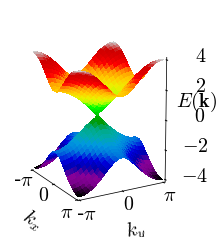

In [4]:
QWZbulk(-2)

## Ribbons

In [5]:
#define Pauli matrices;
s0=matrix([[1,0],[0,1]])
s1=matrix([[0,1],[1,0]])
s2=matrix([[0,-1j],[1j,0]])
s3=matrix([[1,0],[0,-1]])
#Seting up hopping matrices
#QWZ (aka. half-BHZ) sofar
u=s3;
t_x=(s3-1j*s1)/2;
t_y=(s3-1j*s2)/2;

## Finite sample - the potato argument

In [6]:
class finite_lattice:
    '''
    Class for a generic 2D lattice.
    '''
    def __init__(self,xL=4,yL=3,**kwargs):
        '''
        Initializatin
        '''

        self.xL=xL
        self.yL=yL
        self.xran=arange(xL)
        self.yran=arange(yL)
        self.ym,self.xm=meshgrid(self.yran,self.xran)
        self.y,self.x=(self.ym.flatten(),self.xm.flatten())

    def make_ham(self,Tx,Ty,U,**kwargs):
        '''
        Make Hamiltonian for a square shape
        '''
        ODX=ssp.diags([ones(self.xL-1)],[1])
        DX =ssp.diags([ones(self.xL)],[0])
        ODY=ssp.diags([ones(self.yL-1)],[1])
        DY =ssp.diags([ones(self.yL)],[0])
        # internal degrees of freedom
        self.idf=shape(Tx)[0]   
        self.H=(ssp.kron(DX,ssp.kron(ODY,Ty))+
                ssp.kron(DX,ssp.kron(ODY,Ty)).H +
                ssp.kron(ODX,ssp.kron(DY,Tx))+
                ssp.kron(ODX,ssp.kron(DY,Tx)).H +
                ssp.kron(DX,ssp.kron(DY,U)) )
        
    def plot_fullwf(self,psi,**kwargs):
        '''
        Plotter for wavefunctions of the whole lattice.
        '''
        pcolor(self.xm,self.ym,
               reshape(sum(
                    reshape(abs(psi)**2,(self.xL*self.yL,self.idf)),
                    axis=1),(self.xL,self.yL)
                      ),**kwargs)

        
    def cut_potato(self,potx,poty,inverted=False,**kwargs):
        '''
        Make Hamiltonian for an arbitrary shape.
        We carve out the shape from the rectangle
        of the original lattice.
        '''
        potato=matplotlib.path.Path(array([potx,poty]).T)        
        self.potato_cindx=(potato.contains_points(
                           array([self.x,self.y]).T))
        self.potato_hindx=(potato.contains_points(
                           array([kron(self.x,ones(self.idf)),
                                  kron(self.y,ones(self.idf))]).T))
        if inverted:
            self.potato_cindx=logical_not(self.potato_cindx)
            self.potato_hindx=logical_not(self.potato_hindx)
        self.Hpotato=self.H[:,self.potato_hindx][self.potato_hindx,:]

In [7]:
QWZ=finite_lattice(xL=160,yL=100)
QWZ.make_ham(t_x,t_y,-1.8*u)

In [8]:
#va,ve=sla.eigsh(QWZ.H,100,sigma=0.02)

In [9]:
#figsize(10,5)
#@interact(i=(0,len(va)-1))
#def play(i=0):
#    subplot(121)
#    plot(arange(len(va)),sort(va),'r+')
#    plot(arange(len(va))[i],va[argsort(va)][i],'wo',ms=10)
#    subplot(122,aspect='equal')
#    QWZ.plot_fullwf(ve[:,argsort(va)[i]],cmap='magma')
#    axis('off');

In [10]:
th=linspace(0,2*pi,100)
krx,kry=(60*(cos(th)+0.1*cos(3*th-0.3))+80,40*(sin(th)-0.1*sin(6*th+0.5))+50)
QWZ.cut_potato(krx,kry)
Vdis=ssp.diags(kron(randn(int(QWZ.Hpotato.shape[0]/QWZ.idf)),ones(QWZ.idf)),0)

In [11]:
vap,vep=sla.eigsh(QWZ.Hpotato+0.01*Vdis,100,sigma=0.01)
vep=vep[:,argsort(vap)]
vap=sort(vap)
dummy=zeros((QWZ.H.shape[0],len(vap)),dtype=complex)
dummy[QWZ.potato_hindx,:]=vep

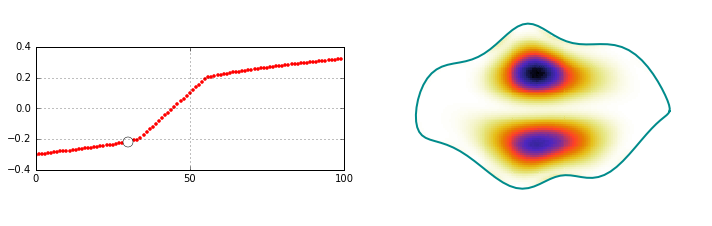

In [12]:
figsize(10,7)
@interact(i=(0,len(vap)-1))
def play(i=0):
    subplot(121,aspect=50)
    plot(arange(len(vap)),vap,'r.')
    plot(arange(len(vap))[i],vap[i],'wo',ms=10)
    ylim(-0.4,0.4)
    yticks(linspace(-0.4,0.4,5))
    xticks(linspace(0,len(vap),3))
    grid()
    subplot(122,aspect='equal')
    QWZ.plot_fullwf(dummy[:,i],cmap='CMRmap_r')
    plot(krx+0.5,kry+0.5,'-',color='darkcyan',lw=2)
    axis('off');
    tight_layout()